# HW 6 
## Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# load Los Angeles data
df=pd.read_excel('LAmeantempdata.xlsx')
data=df.to_numpy()
TMP_LA_month=data[:,7]
#TMP_LA_year=np.nanmean(TMP_LA_month,1)
# convert to deg C
TMP_LA_month_degC=(TMP_LA_month-32)*(5/9)
year=df.Year.to_numpy()
TMP_LA_month_degC

array([20.94444444, 20.5       , 19.16666667, 21.94444444, 21.77777778,
       22.5       , 22.61111111, 22.27777778, 22.44444444, 22.        ,
       22.94444444, 21.61111111, 22.88888889, 23.16666667, 20.        ,
       20.83333333, 19.61111111, 20.22222222, 21.61111111, 20.83333333,
       21.33333333, 20.88888889, 21.5       , 21.11111111, 20.27777778,
       20.22222222, 20.83333333, 20.61111111, 22.33333333, 22.38888889,
       21.16666667, 19.83333333, 21.22222222, 20.77777778, 20.44444444,
       21.38888889, 19.38888889, 21.11111111, 19.38888889, 22.38888889,
       21.05555556, 21.66666667, 21.83333333, 22.05555556, 20.83333333,
       21.11111111, 20.77777778, 22.38888889, 21.05555556, 22.27777778,
       20.66666667, 22.27777778, 22.66666667, 25.11111111, 20.61111111,
       20.77777778, 22.38888889, 21.5       , 23.38888889, 21.83333333,
       20.83333333, 21.5       , 21.5       , 21.5       , 22.05555556,
       21.5       , 19.22222222, 21.61111111, 22.11111111, 22.77

<function matplotlib.pyplot.show(close=None, block=None)>

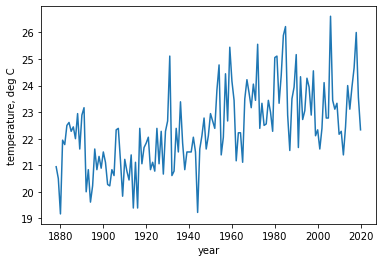

In [4]:
#plot time series
plt.plot(year, TMP_LA_month_degC)
plt.xlabel('year')
plt.ylabel('temperature, deg C')
plt.show

## Part 2

In [5]:
ds=xr.open_dataset('./air.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 883)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [6]:
#extract 1948-2020
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2020-12-01"))

In [7]:

# Los Angeles latitude and longitude
# 34.052235° N, 118.243683° W

# select data for the grid cell where Los Angeles located
TMP_LA_NCEP=TMP_NCEP.sel(lat=34.052235,lon=360-118.243683,method="nearest")

# calculate annual mean temperature for Los Angeles
TMP_LA_NCEP_year=TMP_LA_NCEP.groupby('time.year').mean('time')

# calculate climatological mean temperature for Los Angeles
TMP_LA_NCEP_month=TMP_LA_NCEP.groupby('time.month').mean('time')

# July temperature for Los Angeles
mon=7;
TMP_LA_NCEP_JUL=TMP_LA_NCEP.sel(time=TMP_LA_NCEP['time.month']==mon)
TMP_LA_NCEP_JUL

<xarray.DataArray 'air' (time: 73)>
array([23.621616, 24.500965, 25.599674, 25.540968, 25.620003, 26.886126,
       26.789675, 23.338068, 23.667097, 25.62355 , 22.73613 , 26.028063,
       25.489033, 25.047092, 22.722584, 23.135159, 24.372576, 22.904194,
       23.621288, 24.974838, 23.838707, 24.136774, 25.088068, 24.294186,
       25.0258  , 22.711615, 23.30226 , 22.829994, 23.473227, 23.786453,
       23.371286, 23.50516 , 25.056448, 24.034842, 22.93677 , 22.994516,
       25.15484 , 25.25806 , 22.283552, 21.461285, 24.770002, 25.139027,
       24.25387 , 22.396126, 22.419031, 20.5471  , 22.975807, 24.009348,
       25.847097, 24.040644, 24.422903, 23.09097 , 22.837746, 22.703226,
       24.460648, 26.730642, 23.860964, 25.947098, 27.600325, 24.677422,
       24.551292, 25.240318, 23.363869, 23.45226 , 22.825808, 23.9771  ,
       24.430325, 22.533056, 24.117735, 25.415312, 25.799997, 22.966124,
       23.04112 ], dtype=float32)
Coordinates:
    lat      float32 35.0
    lon      float32 242.5
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2020-07-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

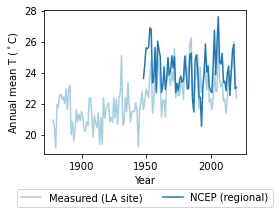

In [19]:
# make a figure that fits into a single column
fig=plt.figure(figsize=(3.5, 2.5)) # define figure size, unit: inches
ax=fig.add_axes([0.1, 0.15, 0.8, 0.8])
cmap=plt.get_cmap('Paired')
plt.plot(year,TMP_LA_month_degC,label='Measured (LA site)',color=cmap(0)) 
plt.plot(TMP_LA_NCEP_JUL["time.year"],TMP_LA_NCEP_JUL,label='NCEP (regional)',color=cmap(1))
plt.xlabel('Year')
plt.ylabel('Annual mean T ($^\circ$C)')
# add figure legend and move outside 
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol= 2)

# save figure as .PDF and .PNG
# put save commands before plt.show()
fn='Fig_LA_temp'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")
plt.show()

## Part 3

In [8]:
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [9]:
#extract 1950-1960
TMP_NCEP_fifties=ds.air.sel(time=slice("1950-01-01","1960-01-01"))
#extract 2010-2020
TMP_NCEP_tens=ds.air.sel(time=slice("2010-01-01","2020-01-01"))

# Select July data for every year and average
TMP_NCEP_fifties=TMP_NCEP_fifties.sel(time=TMP_NCEP_fifties['time.month']==7).mean(dim='time')
TMP_NCEP_tens=TMP_NCEP_tens.sel(time=TMP_NCEP_tens['time.month']==7).mean(dim='time')

In [10]:
#build map 
X=ds.lon.values
Y=ds.lat.values
# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)

In [20]:
# calculate differences
delta_TMP_JUL=TMP_NCEP_tens-TMP_NCEP_fifties

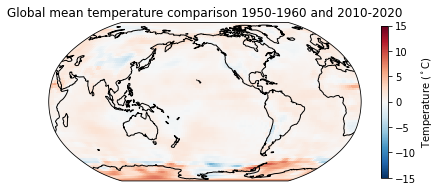

In [21]:
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
cf=ax.pcolormesh(Xb,Yb,delta_TMP_JUL, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
plt.colorbar(cf, ax=ax,shrink=0.7, label='Temperature ($^\circ$C)')

ax.set_title('Global mean temperature comparison 1950-1960 and 2010-2020')

fn='Fig_global_mean_temp_difference_RobinsonProj'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()